# Classification non supervisée

On cherche des groupes (classes) 'spontannés' pour regrouper des données en des groupes 'cohérents'. Cette cohérence est basée sur une notion de distance/similarité : les individus d'une même classe sont plus proches/similaires que ceux de classes différentes.

## Illustration avec les `iris`

Les objets/êtres vivants n'ont pas de classes **objectives** : c'est l'intelligence de l'observateur qui les a regroupées en espèces.

# Algorithmes

Les algorithmes de classification non-supervisée peuvent avoir deux types d'approche:

* maximiser la cohérence 'globale' de chaque classe
* maximiser la cohérence 'locale' de chaque classe

## K-means (K-moyennes)

Algorithme qui maximise la cohérence globale, il procède par itérations. Pour $k$ classes représentées par $k$ centroïdes :
1. affectation de chaque points à la classe du centroles plus proche de centroïdes
2. positionnement de chaque centroïde au barycentre des points de sa classe

Cf. [visualisation](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

## DBScan

Algorithme qui maximise la cohérence locale en aggrégeant de proche en proche les points voisins. Cf. [visualisation](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/).

## Nombre de classes

Suivant les critères de classification non-supervisée, on devra définir le nombre de classes à l'avance. En effet, des classes de 1 individu seraient maximalement cohérentes, mais trivialement inutiles.

Sur le jeu de données `iris`, on constate que les espèces correspondent à des groupes d'individus semblables, c'est-à-dire proche dans l'espace de représentation.

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import seaborn as sns
sns.set()

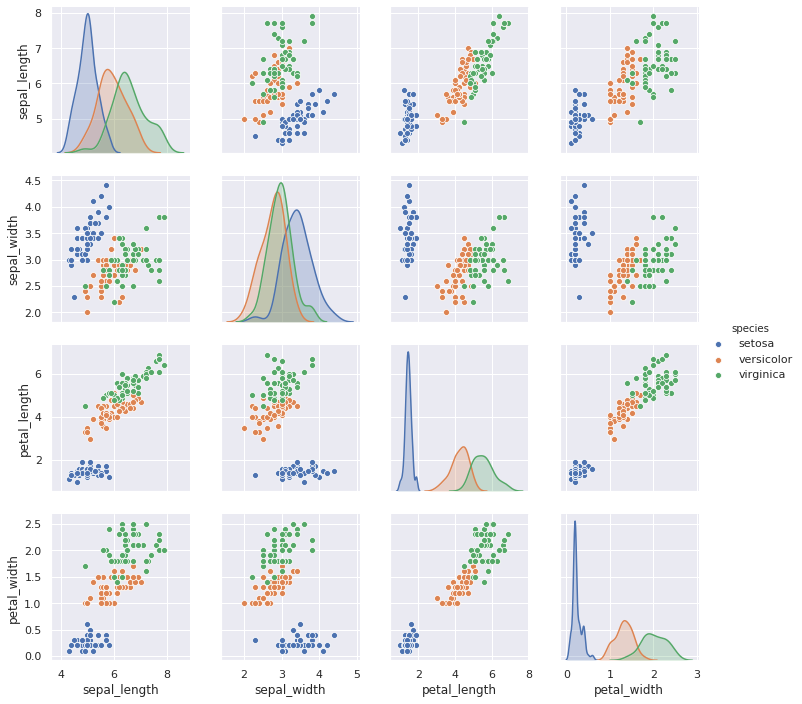

In [2]:
iris_df= sns.load_dataset("iris")
sns.pairplot(iris_df, hue='species')

On peut se poser la question des classes qu'on pourrait trouver automatiquement sans avoir l'information de l'espèce de chaque individu.

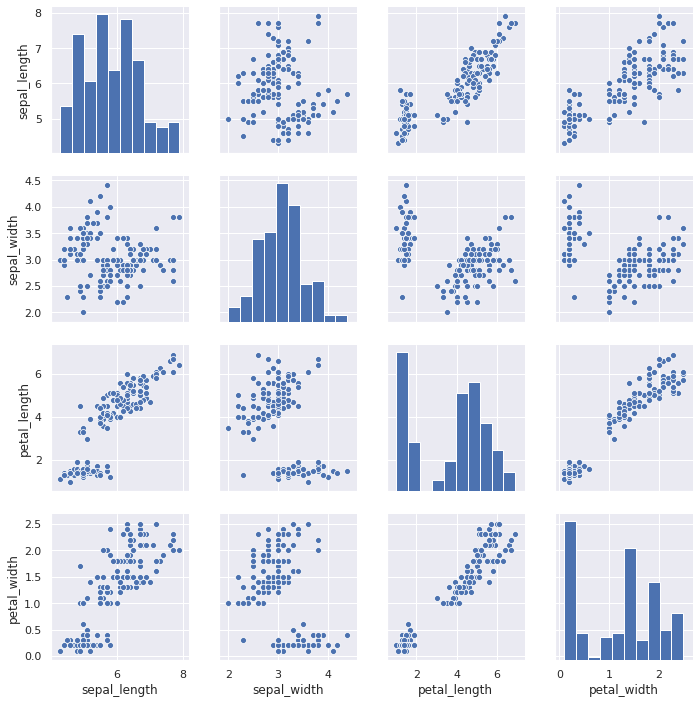

In [3]:
iris_df= sns.load_dataset("iris")
iris_features=iris_df.drop('species', axis=1)
sns.pairplot(iris_features)

On utilise l'implémentation de `KMeans` de `sklearn`. L'initialisation étant aléatoire, on fixe l'état initial du générateur de nombres aléatoires si l'on veut des résultats reproductibles :

In [20]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3, random_state= 42)
model.fit(iris_features)
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

On peut afficher les classes obtenues automatiquement :

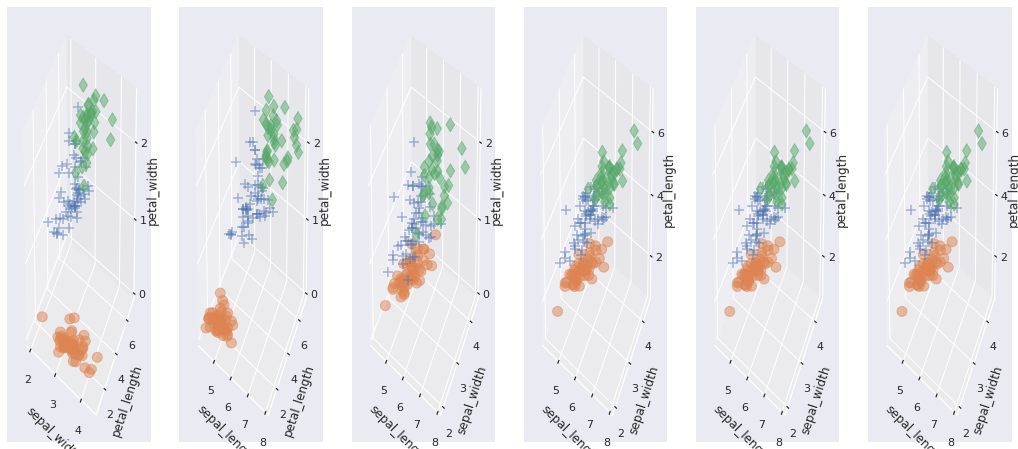

In [21]:
fig = plt.figure(figsize=(18,8))
markers= [['+','o','d'][i] for i in model.labels_]
for fig_idx, f in enumerate(iris_df.columns[:-1], start=1):
    features = list(iris_df.columns[:-1])
    features.remove(f)
    ax = fig.add_subplot(1, len(iris_df.columns[:-1]),fig_idx,projection='3d')
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.set_zlabel(features[2])
    for i in range(3):
        select= (model.labels_ == i)
        surf = ax.scatter(iris_df.loc[select,features[0]], iris_df.loc[select, features[1]], iris_df.loc[select, features[2]], marker=['+','o','d'][i], s=100, alpha=0.5)


In [22]:
import numpy as np

Si l'on voulait seulement évaluer la classification non supervisée par rapport à une classification établie (par exemple les espèces codées dans `species`), on pourrait le faire directement avec la fonction [ajusted_rand_score](https://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index), sans avoir à se préoccuper de l'ordre :

In [23]:
from sklearn import metrics
metrics.adjusted_rand_score(iris_df['species'], model.labels_)

0.7302382722834697

Mais pour avoir des affichages cohérents, utilisant les mêmes couleurs, on va réordonner les labels :

In [24]:
from scipy.stats import mode
def order_of_clusters(target, clusters):
    res={}
    for i in np.unique(clusters):
        mask = (clusters == i)
        res[i] = mode(target[mask])[0][0]
    return res

In [25]:
iris_df['species_id']=iris_df['species'].astype("category").cat.codes
iris_df['species_id'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

In [26]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [27]:
kmeans_reorder=order_of_clusters(iris_df['species_id'], model.labels_)
iris_df['label_kmeans']=[kmeans_reorder[i] for i in model.labels_]
iris_df['label_kmeans'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

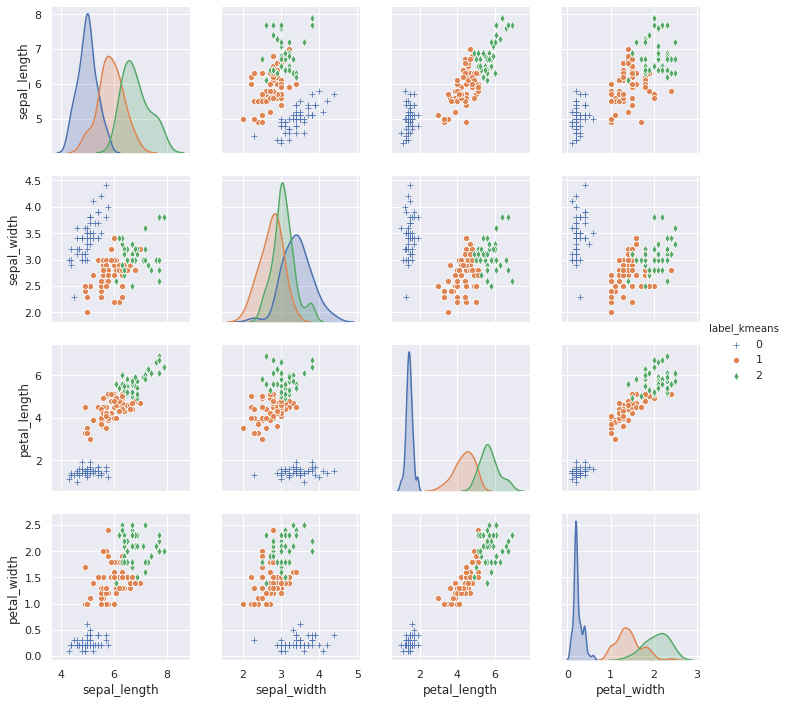

In [28]:
sns.pairplot(iris_df, hue='label_kmeans',markers=['+','o','d'], vars=iris_features.columns)

[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


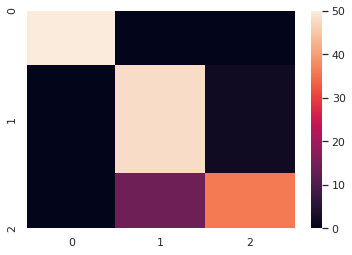

In [29]:
from sklearn.metrics import confusion_matrix
conf_mat= confusion_matrix(iris_df['species_id'],iris_df['label_kmeans'])
print(conf_mat)
sns.heatmap(conf_mat)

On pourrait facilement calculer le pourcentage de bonnes classifications, mais il ne vaut 0 que pour une classification qui n'aurait aucun label correct :

In [30]:
100 * (iris_df['species_id'] == iris_df['label_kmeans']).sum() / iris_df.shape[0]

89.33333333333333

Pour cette raison, on utilisera plutôt la fonction [adjusted_rand_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score) évoquée plus haut, qui vaut 0 pour une classification qui n'est pas meilleure que le hasard :

In [31]:
from  sklearn import metrics
metrics.adjusted_rand_score(iris_df['species_id'], iris_df['label_kmeans'])

0.7302382722834697

In [32]:
100 * (iris_df['species_id'] == np.random.randint(0,3, iris_df.shape[0])).sum() / iris_df.shape[0]

36.0

In [33]:
metrics.adjusted_rand_score(iris_df['species_id'], np.random.randint(0,3, iris_df.shape[0]))

-0.005061742430394262

Le cas du jeu de données `iris` est assez facile pour l'algorithme k-means, mais on peut facilement voir que des jeux de données le mettent en échec, dès que la distance 'globale' (au centroïde des classes) n'est plus pertinente :

In [34]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

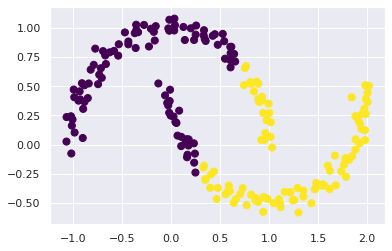

In [35]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

À contrario, un algorithme comme le [Spectral Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html) est adapté aux classes non convexes :

/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


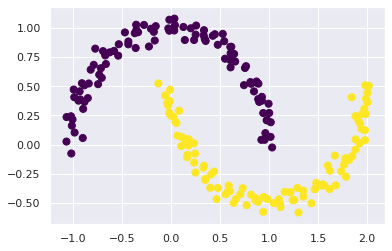

In [36]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

On peut l'appliquer aux `iris` :

In [37]:
model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
model.fit(iris_features)
iris_df['label_spectral_clustering']=[order_of_clusters(iris_df['species_id'], model.labels_)[i] for i in model.labels_]
iris_df['label_spectral_clustering'].values

/home/bernard/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

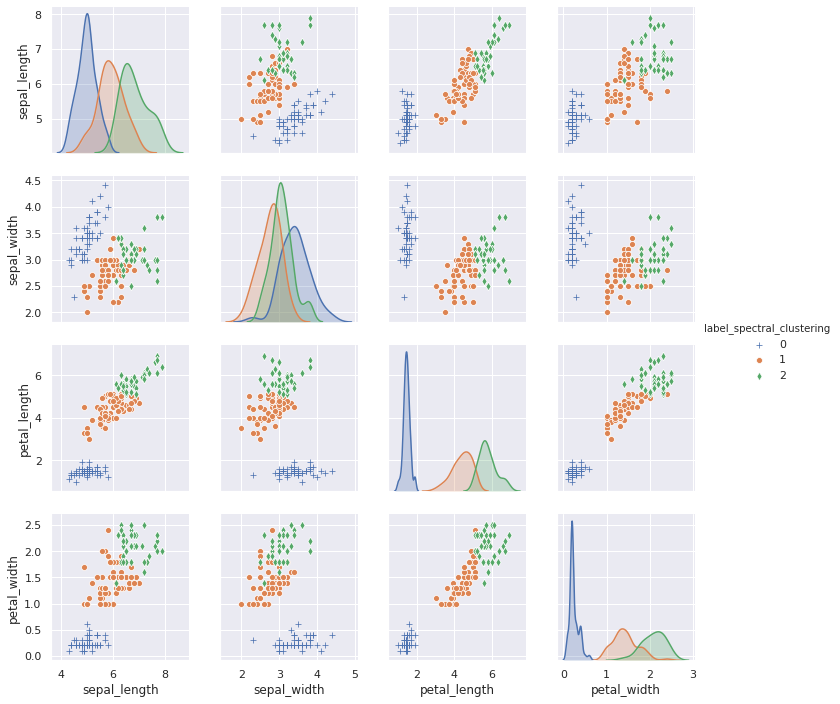

In [38]:
sns.pairplot(iris_df, hue='label_spectral_clustering',markers=['+','o','d'], vars=iris_features.columns)

[[50  0  0]
 [ 0 50  0]
 [ 0 14 36]]


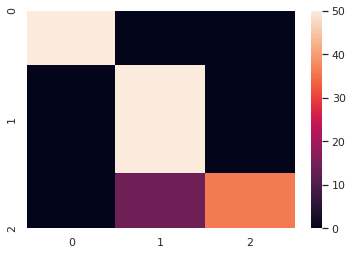

In [40]:
conf_mat= confusion_matrix(iris_df['species_id'],iris_df['label_spectral_clustering'])
print(conf_mat)
sns.heatmap(conf_mat)

On constate que l'algorithme a parfaitement classifié les individus des deux premières espèces d'iris.

In [41]:
metrics.adjusted_rand_score(iris_df['species_id'], iris_df['label_spectral_clustering'])

0.7591987071071522

## Autres algorithmes de classification non-supervisée

La [documentation de sklearn](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py) propose le code suivant pour illustrer le comportement de divers algorithmes de clustering non supervisés.

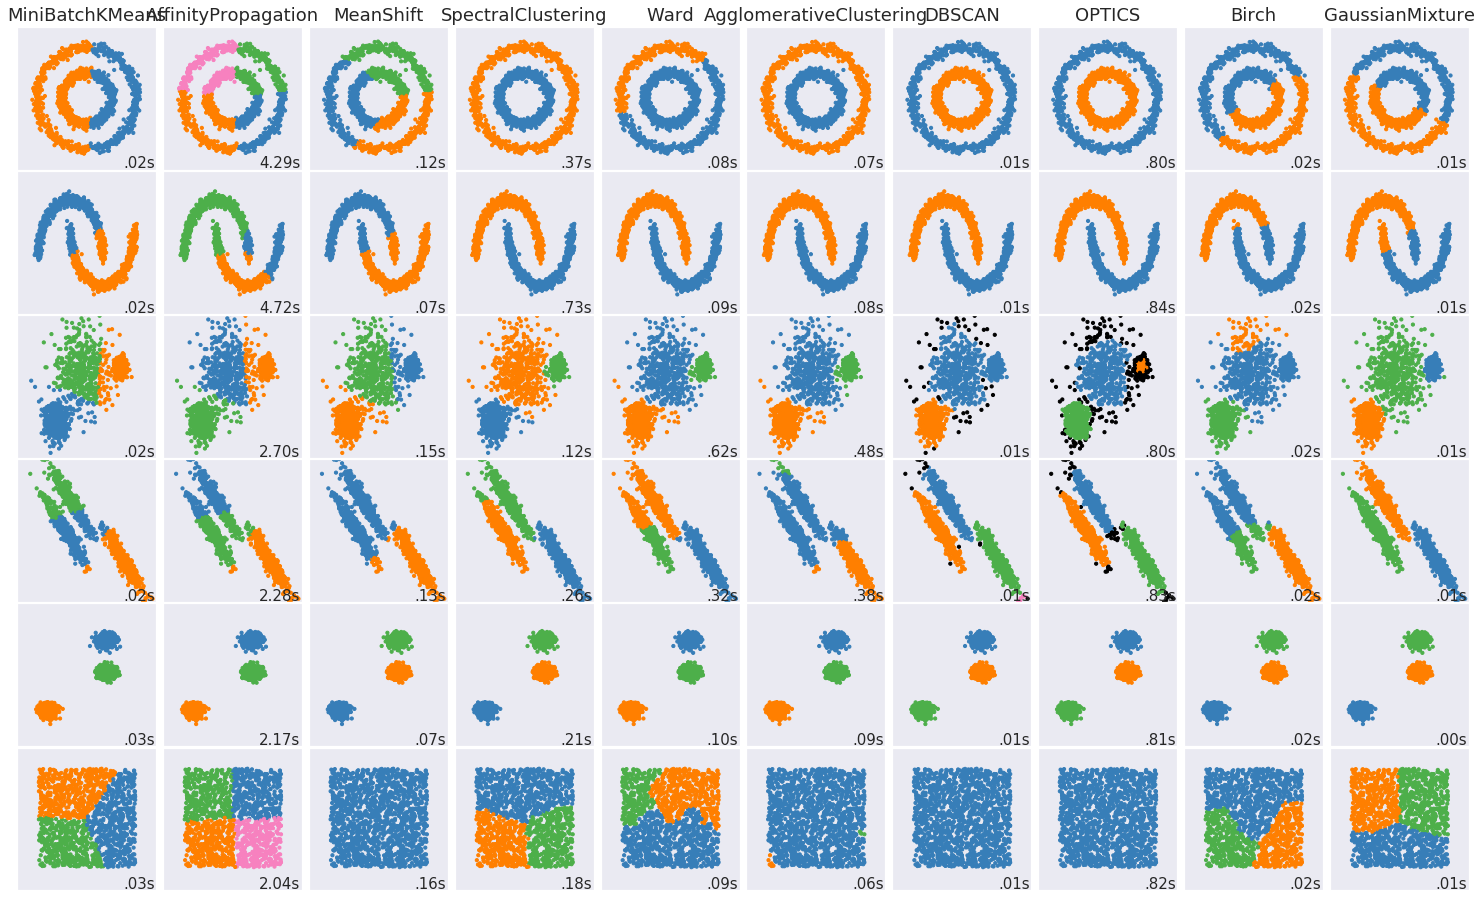

In [39]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('OPTICS', optics),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()